## Multivariate Linear Regression

In [53]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
% matplotlib inline

In [206]:
class LinearRegression:
        
    def hyp(self):
        return np.dot(self.X, self.theta)
        
    def get_cost(self):
        return sum((self.hyp() - self.y)**2) / (self.m * 2.0)
    
    def fscale(self):
        self.X= self.X / (self.X.max(axis= 0) - self.X.min(axis= 0))
        self.y= self.y / (max(self.y) - min(self.y))
        
    def computeStandard(self):
        from sklearn.linear_model import LinearRegression
        self.linreg= LinearRegression()
        self.linreg.fit(self.X, self.y)

    def preprocess(self, X, y, alpha):
        (self.m, self.n)= X.shape
        self.columns= X.columns
        self.X= X.values
        self.y= y.values
        self.fscale()
        self.computeStandard()
        self.n+=1
        self.X= np.insert(self.X, 0, 1, axis= 1)
        self.y= self.y[None].transpose()
        self.alpha= alpha
        self.theta= (np.ones(self.n)*10)[None].transpose()
        
    def plot(self):
        for i in range(1, self.n):
            f= plt.figure()
            ax = f.add_subplot(111)
            yd= (max(self.X[:,i] * self.theta[i]) - min(self.X[:,i] * self.theta[i]))
            yy= self.y* yd
            offset= yd * self.theta[0]
            print("For {} Offset is {}".format(i,offset))
            ax.scatter(self.X[:,i], yy)
            #ax.scatter(self.X[:,i], self.X[:,i] * self.theta[i])
            #ax.plot([0,1.0], [0, self.theta[i]], 'g')
            ax.plot([0,1.0], [offset, self.theta[i]+offset], 'g')
            plt.ylabel('Effect on price')
            plt.xlabel('{}'.format(self.columns[i-1]))
        
    def fit(self, X, y, alpha= 0.1):
        self.preprocess(X, y, alpha)
        pc= math.inf
        change= 1
        iteration=0
        while(change>0.000000000001):
            der = (self.hyp() - self.y).transpose()
            der = np.dot(der , self.X) * self.alpha / self.m
            self.theta= self.theta - der.transpose()

            self.cost= self.get_cost()
            change= pc - self.cost
            pc= self.cost
            iteration += 1
            if(iteration % 500 == 0):
                print("{}. Cost: {}, theta: {}".format(iteration, self.cost, self.theta.transpose()))
        print('+'*70, "\n{}. Final Cost: {}, theta: {}".format(iteration, self.cost, self.theta.transpose()))
        print("sklearn: theta: ",self.linreg.intercept_, self.linreg.coef_,"\n")
        
            
    def predict(self, X):
        X= X.values
        X= X / (X.max(axis= 0) - X.min(axis= 0))
        X= np.insert(X, 0, 1, axis= 1)
        return np.dot(X, self.theta)
    
    def mse(self, y_true, y_pred):
        y_true= y_true.values
        y_true= y_true / (max(y_true) - min(y_true))
        y_true= y_true[None].transpose()
        return sum((y_true - y_pred)**2) / y_true.shape[0]
    
    def rmsq(self, y_true, y_pred):
        return np.sqrt(self.mse(y_true, y_pred))

### Demo Dataset

In [207]:
np.random.seed(42)
a= np.random.randint(1, 25, 50)
b= np.random.randint(100, 1000, 50)
c= 11 + 2 * a + 5 * b
data= pd.DataFrame({"TV":a, "Radio":b, "Sales":c})
X= data[['TV','Radio']]
y= data['Sales']

In [208]:
linreg= LinearRegression()
linreg.fit(X, y, alpha= 0.3)

500. Cost: [1.28997285e-07], theta: [[8.75633743e-04 1.12744615e-02 9.96029109e-01]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
787. Final Cost: [3.37160487e-11], theta: [[0.00241695 0.01023029 0.99469337]]
sklearn: theta:  0.002442273534635664 [0.01021314 0.9946714 ] 



For 1 Offset is [2.4726056e-05]
For 2 Offset is [0.00240412]


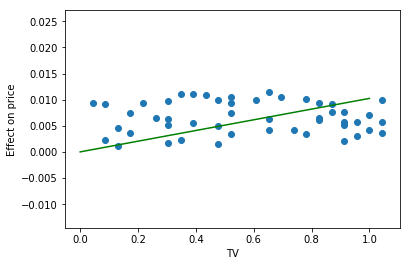

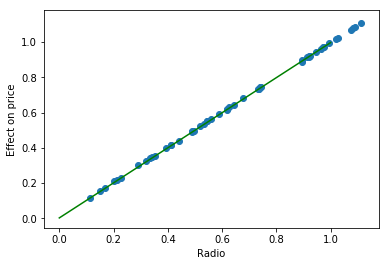

In [209]:
linreg.plot()

In [210]:
y_pred= linreg.predict(X)
print("MSE:  ",linreg.mse(y, y_pred))
print("RMSE: ",linreg.rmsq(y, y_pred))

MSE:   [6.74320973e-11]
RMSE:  [8.2117049e-06]


### Advertising Dataset

In [211]:
data= pd.read_csv('Files/Advertising.csv', index_col= 0)
feature_cols= ['TV', 'Radio', 'Newspaper']
target_col= 'Sales'
X= data[feature_cols]
y= data[target_col]

In [212]:
linreg= LinearRegression()
linreg.fit(X, y, alpha= 0.7)

500. Cost: [0.0021577], theta: [[ 0.11568268  0.53278042  0.36810195 -0.00447804]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
572. Final Cost: [0.0021577], theta: [[ 0.11569944  0.5327799   0.36814158 -0.00460679]]
sklearn: theta:  0.11570430588422892 [ 0.53277975  0.3681531  -0.00464421] 



In [213]:
y_pred= linreg.predict(X)
print("MSE:  ",linreg.mse(y, y_pred))
print("RMSE: ",linreg.rmsq(y, y_pred))

MSE:   [0.0043154]
RMSE:  [0.06569174]


For 1 Offset is [0.06164233]
For 2 Offset is [0.04259377]
For 3 Offset is [0.000533]


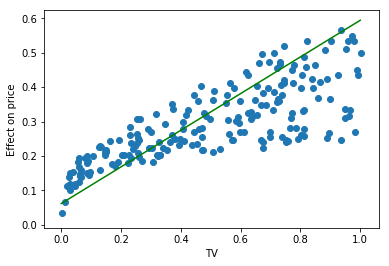

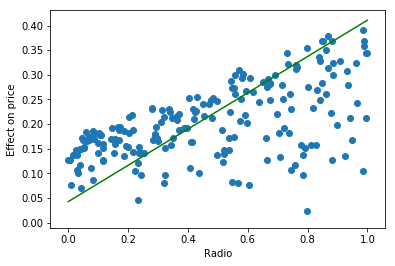

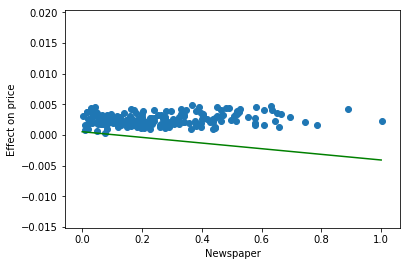

In [214]:
linreg.plot()

## DONE